In [1]:
from astroplan import Observer
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord

from astroplan import ObservingBlock
from astroplan.constraints import TimeConstraint
from astropy import units as u
from astroplan.constraints import AtNightConstraint, AirmassConstraint
from astroplan.scheduling import Transitioner

from astroplan.scheduling import SequentialScheduler
from astroplan.scheduling import Schedule
from astroplan import FixedTarget
from astroplan.scheduling import PriorityScheduler

In [2]:
observatory = Observer.at_site(site_name='MJO')

In [3]:
def make_target(ra,dec,name):
    c = SkyCoord(ra,dec,unit=u.deg)
    targ = FixedTarget(coord=c,name=name)
    return targ

def make_block(obj,priority=0,readout=32):

    read_out = readout * u.second

    targ = make_target(obj['ra'],obj['dec'],obj['object'])
    exp = obj['expTime'] * u.s
    repeats = obj['count']
    filt = obj['filter']


    block = ObservingBlock.from_exposures(targ, priority, exp, repeats, read_out,
                                        configuration = {'filter': filt})
    return block

In [4]:
import json 
test = json.load(open('look.json'))

In [5]:
blocks = []
for ob in test:
    blocks +=  [make_block(ob)]

In [6]:
observatory = Observer.at_site('MJO')

global_constraints = [AirmassConstraint(max = 2.5, boolean_constraint = False),
                      AtNightConstraint.twilight_civil()]

noon_before = Time('2022-11-06 06:00')
noon_after = Time('2022-11-06 20:00')

slew_rate = .5*u.deg/u.second # need to measure
transitioner = Transitioner(slew_rate,
                            {'filter':{('R','V'): 180*u.second,
                                       ('I','V'): 240*u.second,
                                       ('I','R'): 240*u.second,
                                       'default': 180*u.second}}) # need to measure

In [7]:
seq_scheduler = SequentialScheduler(constraints = global_constraints,
                                    observer = observatory,
                                    transitioner = transitioner)
# Initialize a Schedule object, to contain the new schedule
sequential_schedule = Schedule(noon_before, noon_after)

# Call the schedule with the observing blocks and schedule to schedule the blocks
seq_scheduler(blocks, sequential_schedule)


Schedule containing 18 observing blocks between 2022-11-06 06:00:00.000 and 2022-11-06 20:00:00.000

In [8]:
prior_scheduler = PriorityScheduler(constraints = global_constraints,
                                    observer = observatory,
                                    transitioner = transitioner)
# Initialize a Schedule object, to contain the new schedule
priority_schedule = Schedule(noon_before, noon_after)

# Call the schedule with the observing blocks and schedule to schedule the blocks
prior_scheduler(blocks, priority_schedule)

Schedule containing 16 observing blocks between 2022-11-06 06:00:00.000 and 2022-11-06 20:00:00.000

In [12]:
a = priority_schedule.to_table()

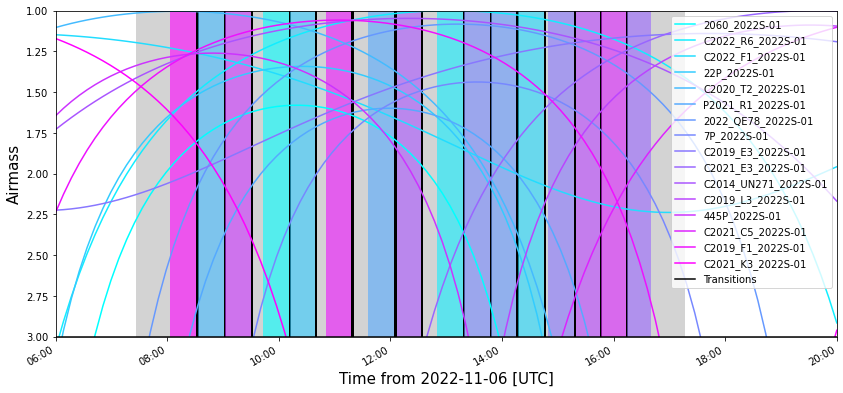

In [10]:
import warnings
warnings.filterwarnings("ignore")

from astroplan.plots import plot_schedule_airmass
import matplotlib.pyplot as plt

# plot the schedule with the airmass of the targets
plt.figure(figsize = (14,6))
plot_schedule_airmass(priority_schedule,show_night='True',use_local_tz=True)
plt.legend(loc = "upper right")
plt.show()

In [43]:
%matplotlib inline

In [26]:
date = '20221114'

In [28]:
date[0:4]

'2022'

In [33]:
dat = '{y}-{m}-{d}'.format(y=date[0:4],m=date[4:6],d=date[6:8])

In [34]:
dat

'2022-11-14'

In [11]:
import os


NameError: name '__file__' is not defined

In [16]:
b = a.to_pandas()

In [17]:
from datetime import datetime

In [18]:
print(datetime.now())

2022-11-12 20:04:48.210271


In [19]:
d = datetime.now()

In [22]:
str(d.year) + str(d.month) + str(d.day)

'20221112'